In [123]:
import numpy as np
import pandas as pd
import re
import scipy.stats as stats

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json
import folium

### 생필품 가격 - 유동인구수 상관분석을 위한 dataframe

In [53]:
# dataframe 행 생략없이 출력
pd.set_option('display.max_rows', 200)

In [54]:
df_necessities = pd.read_csv('../datas/huge/df_necessities.csv', encoding='cp949')
df_necessities = df_necessities.drop(['Unnamed: 0'], axis=1)
df_market_add = pd.read_csv('../datas/huge/df_market_add.csv', encoding='cp949')
df_market_add = df_market_add.drop(['Unnamed: 0'], axis=1)
df_customer = pd.read_csv('../datas/huge/df_customer.csv', encoding='cp949')
df_customer = df_customer.drop(['Unnamed: 0'], axis=1)

In [55]:
# 생필품가격 데이터에 주소 데이터 병합
df1 = pd.merge(df_necessities, df_market_add, on=['시장이름'], how='left') 

In [56]:
df_check = df1[df1['위도'].isnull()]
df_check['시장이름'].unique()

array([], dtype=object)

In [57]:
# 유동인구수 데이터 추가로 병합 
df2 = pd.merge(df1, df_customer, on=['년도','분기','시장이름'], how='left') 

In [58]:
df2

,일련번호,시장이름,품목이름,실판매규격,가격(원),년도-월,자치구이름,년도,분기,위도,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,1621162,통인시장,양파(1.5kg망),1kg,2000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
1,1628949,남부종합시장,호박,1개268g,1500,2020-12,서초구,2020,4,37.494920,...,174.0,176.0,240.0,182.0,358.0,303.0,180.0,175.0,247.0,188.0
2,1622882,통인시장,양파(1.5kg망),1kg,2000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
3,1622883,통인시장,상추(100g),400g,3000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
4,1622885,통인시장,호박(인큐베이터),1개,1000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167863,449830,구로시장,달걀,10개,1500,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167864,449831,구로시장,"조기(냉동,수입산)",1마리(20cm),1500,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167865,449832,구로시장,"명태(러시아,냉동)",1마리(42cm),1700,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167866,449833,구로시장,"오징어(생물,국산)",1마리,2500,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# null 확인
# 확인결과 merge를 잘못한게 아니라 특정 년도(2013년), 분기에 유동인구 데이터가 없는 행들임
df2[df2['총_생활인구_수'].isnull()]

,일련번호,시장이름,품목이름,실판매규격,가격(원),년도-월,자치구이름,년도,분기,위도,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
189,1623370,장위골목시장,무,1개,1500,2020-12,성북구,2020,4,37.612047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,1623369,장위골목시장,배추(2.5~3kg),"1포기 (1망 3입 9,000원)",3000,2020-12,성북구,2020,4,37.612047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1623368,장위골목시장,"배(신고, 600g)",1개,4000,2020-12,성북구,2020,4,37.612047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,1625054,장위골목시장,"배(신고, 600g)",1개,5000,2020-12,성북구,2020,4,37.612047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1625053,장위골목시장,"사과(부사, 300g)","1개 (5개 10,000원)",2000,2020-12,성북구,2020,4,37.612047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167863,449830,구로시장,달걀,10개,1500,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167864,449831,구로시장,"조기(냉동,수입산)",1마리(20cm),1500,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167865,449832,구로시장,"명태(러시아,냉동)",1마리(42cm),1700,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167866,449833,구로시장,"오징어(생물,국산)",1마리,2500,2013-05,구로구,2013,2,37.488535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# 결측값이 있는 행 전체 제거
df = df2[df2['총_생활인구_수'].notna()].reset_index().drop(['index'], axis = 1) 
df

,일련번호,시장이름,품목이름,실판매규격,가격(원),년도-월,자치구이름,년도,분기,위도,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,1621162,통인시장,양파(1.5kg망),1kg,2000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
1,1628949,남부종합시장,호박,1개268g,1500,2020-12,서초구,2020,4,37.494920,...,174.0,176.0,240.0,182.0,358.0,303.0,180.0,175.0,247.0,188.0
2,1622882,통인시장,양파(1.5kg망),1kg,2000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
3,1622883,통인시장,상추(100g),400g,3000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
4,1622885,통인시장,호박(인큐베이터),1개,1000,2020-12,종로구,2020,4,37.580818,...,548.0,588.0,769.0,524.0,932.0,760.0,511.0,532.0,703.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147814,749804,구로시장,달걀,10개,1500,2015-04,구로구,2015,2,37.488535,...,283.0,253.0,362.0,101.0,1.0,166.0,226.0,222.0,325.0,82.0
147815,749805,구로시장,"조기(냉동,수입산)",1마리(20cm),1500,2015-04,구로구,2015,2,37.488535,...,283.0,253.0,362.0,101.0,1.0,166.0,226.0,222.0,325.0,82.0
147816,749806,구로시장,"명태(러시아,냉동)",1마리(42cm),1700,2015-04,구로구,2015,2,37.488535,...,283.0,253.0,362.0,101.0,1.0,166.0,226.0,222.0,325.0,82.0
147817,749807,구로시장,"오징어(생물,국산)",1마리,2500,2015-04,구로구,2015,2,37.488535,...,283.0,253.0,362.0,101.0,1.0,166.0,226.0,222.0,325.0,82.0


In [61]:
# 결측치 없음 확인
df[df['총_생활인구_수'].isnull()]

,일련번호,시장이름,품목이름,실판매규격,가격(원),년도-월,자치구이름,년도,분기,위도,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수


In [62]:
# column 이름 확인
df.columns.values.tolist()

['일련번호',
 '시장이름',
 '품목이름',
 '실판매규격',
 '가격(원)',
 '년도-월',
 '자치구이름',
 '년도',
 '분기',
 '위도',
 '경도',
 '총_생활인구_수',
 '남성_생활인구_수',
 '여성_생활인구_수',
 '연령대_10_생활인구_수',
 '연령대_20_생활인구_수',
 '연령대_30_생활인구_수',
 '연령대_40_생활인구_수',
 '연령대_50_생활인구_수',
 '연령대_60_이상_생활인구_수',
 '시간대_1_생활인구_수',
 '시간대_2_생활인구_수',
 '시간대_3_생활인구_수',
 '시간대_4_생활인구_수',
 '시간대_5_생활인구_수',
 '시간대_6_생활인구_수',
 '월요일_생활인구_수',
 '화요일_생활인구_수',
 '수요일_생활인구_수',
 '목요일_생활인구_수',
 '금요일_생활인구_수',
 '토요일_생활인구_수',
 '일요일_생활인구_수',
 '남성연령대_10_월요일시간대_1_생활인구_수',
 '남성연령대_10_월요일시간대_2_생활인구_수',
 '남성연령대_10_월요일시간대_3_생활인구_수',
 '남성연령대_10_월요일시간대_4_생활인구_수',
 '남성연령대_10_월요일시간대_5_생활인구_수',
 '남성연령대_10_월요일시간대_6_생활인구_수',
 '남성연령대_10_화요일시간대_1_생활인구_수',
 '남성연령대_10_화요일시간대_2_생활인구_수',
 '남성연령대_10_화요일시간대_3_생활인구_수',
 '남성연령대_10_화요일시간대_4_생활인구_수',
 '남성연령대_10_화요일시간대_5_생활인구_수',
 '남성연령대_10_화요일시간대_6_생활인구_수',
 '남성연령대_10_수요일시간대_1_생활인구_수',
 '남성연령대_10_수요일시간대_2_생활인구_수',
 '남성연령대_10_수요일시간대_3_생활인구_수',
 '남성연령대_10_수요일시간대_4_생활인구_수',
 '남성연령대_10_수요일시간대_5_생활인구_수',
 '남성연령대_10_수요일시간대_6_생활인구_수',
 '남성연령대_10_목요일시간대_1_생활인구_

## 시각화 1번 : 품목별로 14년~20년 기간동안 전통시장에서 얼마나 많이 취급되었는지 

In [63]:
#품목의 빈도수 계산
freq = df[['시장이름','실판매규격','품목이름']].groupby(['품목이름','실판매규격']).count()
freq_s = freq.sort_values(by = ['시장이름'], ascending = False)
freq_s

시장이름
품목이름         실판매규격         
오이(다다기)      1개        6660
달걀(30개)      30개       5137
달걀(10개)      10개       5104
돼지고기(생삼겹살)   600g      4952
배추(2.5~3kg)  1포기       4773
...                     ...
             1망 1.5kg     1
             1ㅍ기          1
             1700         1
             100g         1
호박(인큐베이터),중간 1근           1

[3731 rows x 1 columns]

In [64]:
# 시장별로 유동인구수 편차 확인
# df[['시장이름','총_생활인구_수']].drop_duplicates(['시장이름']).sort_values(by = ['총_생활인구_수'], ascending = False)

시장별로 유동인구수 차이가 크다해도 가격이 변함에 따라 유동인구수도 변한다면 상관계수값에는 영향이 없을지도?

특정시장 분기별(7 * 4 = 28row) 특정품목 가격 - 유동인구

함수로 자동화 - 
품목이름, 실판매규격만 넣으면 알아서 outlier 제거하고 시장별로 상관계수값뽑고 산점도, 지도시각화 -> 가격정책이 유의미한 시장 찾음   
품목이름으로 시작하는것만 추출 -> 실판매규격으로 시작하는것만 추출



### 공통함수 생성 시도..

시각화 2번 : 빈도수 상위 ~개 품목별로 상관계수가 유의미한 시장 찾기?

In [119]:
def Visualize_all(product_name, product_size) :
    # 해당 품목이름. 판매규격에 해당하는 row만 추출
    #df_treat = df[df['품목이름']==product_name]
    #df_treat = df_treat[df_treat['실판매규격']==product_size].reset_index().drop(['index'], axis=1)
    df_treat = df[['시장이름','분기','년도','년도-월','가격(원)','총_생활인구_수']][(df['품목이름']==product_name)&(df['실판매규격']==product_size)&(df['년도']!=2020)&(df['년도']!=2019)]
    
    #df_treat = df[df['품목이름'].str.contains(product_name)]
    #df_treat = df_treat[df_treat['실판매규격'].str.contains(product_size)].reset_index().drop(['index'], axis=1)
    
    # outlier 제거 IQR +- 1.5Q 방식
    quantile_25 = np.percentile(df_treat['가격(원)'].values, 25)
    quantile_75 = np.percentile(df_treat['가격(원)'].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    df_treat = df_treat[(df_treat['가격(원)'] >= lowest)]
    df_treat = df_treat[(df_treat['가격(원)'] <= highest)]
    
    # 상관계수 
    corr_all = stats.pearsonr(df_treat['가격(원)'], df_treat['총_생활인구_수'])
    print(corr_all)
    
    #df_gp = df[['시장이름','분기','년도','년도-월','가격(원)','총_생활인구_수']][(df['품목이름']==product_name)&(df['실판매규격']==product_size)&(df['년도']!=2020)&(df['년도']!=2019)]
    df_gpp = df_treat.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()

    price_r = []
    for i in range(len(df_treat['년도'])) :
        for j in range(len(df_gpp['년도'])):
            if list(df_treat['년도'])[i] == list(df_gpp['년도'])[j] and list(df_treat['분기'])[i] == list(df_gpp['분기'])[j] :
                price_r.append(list(df_treat['가격(원)'])[i] - list(df_gpp['가격(원)'])[j])

    df_treat.insert(5, '상대가격', price_r)

    df_treat_copy = df_treat.copy()
    df_treat_copy = df_treat_copy.rename(columns = {'가격(원)':'price','상대가격':'price_r','총_생활인구_수':'customer'})
    sns.relplot(x="price_r", y="customer", data=df_treat_copy)


    
def Visualize_each(product_name, product_size) :
    # 해당 품목이름. 판매규격에 해당하는 row만 추출
    #df_treat = df[df['품목이름']==product_name]
    #df_treat = df_treat[df_treat['실판매규격']==product_size].reset_index().drop(['index'], axis=1)
    
    df_treat = df[['시장이름','위도','경도','분기','년도','년도-월','가격(원)','총_생활인구_수']][(df['품목이름']==product_name)&(df['실판매규격']==product_size)&(df['년도']!=2020)&(df['년도']!=2019)]
    
    #df_treat = df[df['품목이름'].str.contains(product_name)]
    #df_treat = df_treat[df_treat['실판매규격'].str.contains(product_size)].reset_index().drop(['index'], axis=1)
 
    # outlier 제거 IQR +- 1.5Q 방식
    quantile_25 = np.percentile(df_treat['가격(원)'].values, 25)
    quantile_75 = np.percentile(df_treat['가격(원)'].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    df_treat = df_treat[(df_treat['가격(원)'] >= lowest)]
    df_treat = df_treat[(df_treat['가격(원)'] <= highest)]
        
    # 상관계수
    corr = pd.DataFrame(columns = ['market_name', 'corr', 'p_value'])
    for i in range(len(df_treat['시장이름'].unique())):
        stat = []
        x = df_treat['가격(원)'][df_treat['시장이름']==df_treat['시장이름'].unique()[i]]
        y = df_treat['총_생활인구_수'][df_treat['시장이름']==df_treat['시장이름'].unique()[i]]
        name = df_treat['시장이름'].unique()
        if len(x)>2 and len(y)>2 :
            stat = stats.pearsonr(x,y)
            corr.loc[i] = [name[i], stat[0], stat[1]] 
        else :
            corr.loc[i] = [None, None, None]
            pass
            
                  
    print(corr)
    print('-------------유의한 값-------------')
    print(corr[['market_name', 'corr', 'p_value']][corr['p_value'] < 0.1]) 

        
    
    
# 시장별로 상관계수 구하기, 산점도 그리기

def Visualize_market(product_name, product_size, market_name) :
    # 해당 품목이름. 판매규격에 해당하는 row만 추출
    #df_treat = df[df['품목이름']==product_name]
    #df_treat = df_treat[df_treat['실판매규격']==product_size].reset_index().drop(['index'], axis=1)
    #df_treat = df_treat[df_treat['시장이름'] == market_name].reset_index().drop(['index'], axis=1)
    
    df_treat = df[['시장이름','분기','년도','년도-월','가격(원)','총_생활인구_수']][(df['품목이름']==product_name)&(df['실판매규격']==product_size)&(df['시장이름']==market_name)&(df['년도']!=2020)&(df['년도']!=2019)]
    

    # outlier 제거 IQR +- 1.5Q 방식
    quantile_25 = np.percentile(df_treat['가격(원)'].values, 25)
    quantile_75 = np.percentile(df_treat['가격(원)'].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    df_treat = df_treat[(df_treat['가격(원)'] >= lowest)]
    df_treat = df_treat[(df_treat['가격(원)'] <= highest)]
    
    
   
    # 상관계수
    corr_market = stats.pearsonr(df_treat['가격(원)'], df_treat['총_생활인구_수'])
    print(corr_market)
    

    # 산점도
    df_treat_copy = df_treat.copy()
    df_treat_copy = df_treat_copy.rename(columns = {'가격(원)':'price','총_생활인구_수':'customer'})
    sns.relplot(x="price", y="customer", data=df_treat_copy)

### 쇠고기(한우,불고기)  600g

(0.026465995581271894, 0.4007917126923426)


<ipython-input-103-6d0ec316acfe>:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_treat.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


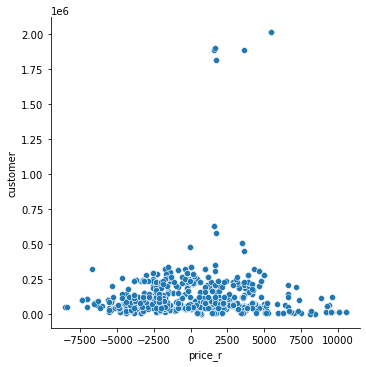

In [104]:
# 모든시장에 대한 산점도
Visualize_all('쇠고기(한우,불고기)','600g')

In [112]:
# 각 시장에 대해 상관계수값 구하고 지도에 시각화

# NaN : 분산이 0이다. 분포되어있지 않고 한곳에만 있어서 편차가 없다.
Visualize_each('쇠고기(한우,불고기)','600g')

C:\Users\123gu\anaconda3\envs\d8\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


   market_name      corr       p_value
0       상계중앙시장  0.176186  1.781133e-01
1     공릉동도깨비시장 -0.389393  2.104018e-03
2       자양골목시장       NaN           NaN
3      노룬산골목시장 -0.486675  1.537392e-01
4         경동시장 -0.488322  1.521431e-01
5      청량리종합시장  0.506969  1.347713e-01
6     방학동도깨비시장 -0.095074  7.938964e-01
7         동원시장 -0.055762  7.159940e-01
8       우림골목시장 -0.394463  8.057747e-03
9         대림시장  0.155018  7.399845e-01
10        대조시장  0.090880  8.161296e-01
11        망원시장  1.000000  0.000000e+00
12        None       NaN           NaN
13      고척근린시장 -0.709929  3.055927e-10
14       남구로시장 -0.200715  2.550322e-01
15      청담삼익시장  0.384772  2.620873e-03
16        도곡시장  0.478051  7.148266e-02
17        신영시장 -0.393498  2.957258e-03
18        인왕시장  0.006178  9.660360e-01
19        영천시장 -0.554031  9.435691e-06
20      화곡본동시장       NaN           NaN
21      송화골목시장 -0.858056  8.297460e-08
22      대림중앙시장 -0.325748  1.428852e-02
23     영등포전통시장  0.891926  1.688872e-02
24        신원시장 -0.929941 

(-0.3893933872169935, 0.002104017757130366)


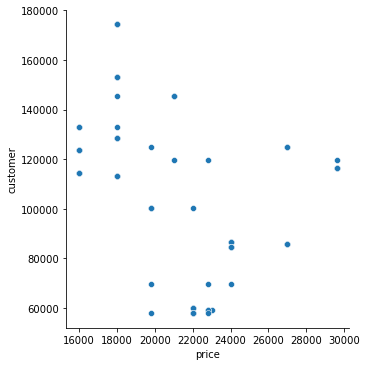

In [120]:
# 특정 시장의 산점도 확인
Visualize_market('쇠고기(한우,불고기)','600g','공릉동도깨비시장')

In [135]:
center = [37.55, 126.986]
m = folium.Map(location=center, zoom_start=11, tiles='Open street map',  scrollWheelZoom=False, height='100%')
m

In [ ]:
def Visualize_each_market(product_name, product_size) :
    # 해당 품목이름. 판매규격에 해당하는 row만 추출
    #df_treat = df[df['품목이름']==product_name]
    #df_treat = df_treat[df_treat['실판매규격']==product_size].reset_index().drop(['index'], axis=1)
    
    df_treat = df[['시장이름','위도','경도','분기','년도','년도-월','가격(원)','총_생활인구_수']][(df['품목이름']==product_name)&(df['실판매규격']==product_size)&(df['년도']!=2020)&(df['년도']!=2019)]
    
    #df_treat = df[df['품목이름'].str.contains(product_name)]
    #df_treat = df_treat[df_treat['실판매규격'].str.contains(product_size)].reset_index().drop(['index'], axis=1)
 
    # outlier 제거 IQR +- 1.5Q 방식
    quantile_25 = np.percentile(df_treat['가격(원)'].values, 25)
    quantile_75 = np.percentile(df_treat['가격(원)'].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    df_treat = df_treat[(df_treat['가격(원)'] >= lowest)]
    df_treat = df_treat[(df_treat['가격(원)'] <= highest)]
        
    # 상관계수
    corr = pd.DataFrame(columns = ['market_name', 'corr', 'p_value'])
    for i in range(len(df_treat['시장이름'].unique())):
        stat = []
        x = df_treat['가격(원)'][df_treat['시장이름']==df_treat['시장이름'].unique()[i]]
        y = df_treat['총_생활인구_수'][df_treat['시장이름']==df_treat['시장이름'].unique()[i]]
        name = df_treat['시장이름'].unique()
        if len(x)>2 and len(y)>2 :
            stat = stats.pearsonr(x,y)
            corr.loc[i] = [name[i], stat[0], stat[1]] 
        else :
            corr.loc[i] = [None, None, None]
            pass
            
corr[['market_name', 'corr', 'p_value']][corr['p_value'] < 0.1]

 



### '돼지고기(생삼겹살)', market, '600g'

(-0.14554897557886942, 4.297179496479921e-09)


<ipython-input-103-6d0ec316acfe>:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_treat.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


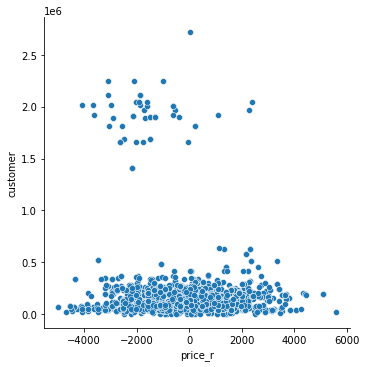

In [105]:
Visualize_all('돼지고기(생삼겹살)','600g')

In [133]:
Visualize_each('돼지고기(생삼겹살)','600g')

   market_name      corr   p_value
0         금남시장  0.111854  0.602816
1       상계중앙시장  0.548712  0.000006
2     공릉동도깨비시장 -0.375214  0.003137
3         광장시장 -0.103094  0.437153
4         통인시장  0.259954  0.044871
5       자양골목시장  0.305806  0.113518
6      노룬산골목시장  0.072415  0.592434
7         경동시장 -0.057251  0.663933
8      청량리종합시장  0.134152  0.306825
9       관악신사시장  0.189920  0.146104
10        사당시장  0.150853  0.677416
11        방이시장  0.223413  0.088957
12        마천시장  0.514780  0.000036
13        동원시장 -0.039475  0.764592
14      우림골목시장 -0.575253  0.000002
15        None       NaN       NaN
16      수유전통시장 -0.225327  0.091942
17        망원시장  0.286424  0.029276
18    마포농수산물시장  0.326310  0.073204
19      송화골목시장 -0.476365  0.000119
20      화곡본동시장 -0.052090  0.695193
21      고척근린시장 -0.035465  0.787917
22       남구로시장 -0.123215  0.420030
23        신원시장  0.315971  0.373785
24        인헌시장 -0.043591  0.740865
25       목3동시장 -0.442987  0.003725
26      대림중앙시장 -0.192827  0.158399
27     영등포전통시장  0.18

C:\Users\123gu\anaconda3\envs\d8\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


### '달걀(30개)', market, '30개'

(0.047941087779047015, 0.15184308731865262)


<ipython-input-119-2bc6fc6815ca>:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_treat.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


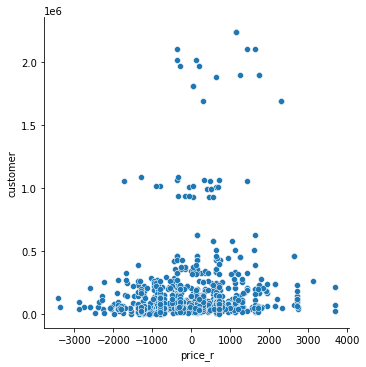

In [132]:
Visualize_all('달걀(30개)','30개')

### '양파(1.5kg망)', market, '1망'

<ipython-input-83-bcc2ff086a89>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_gp.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


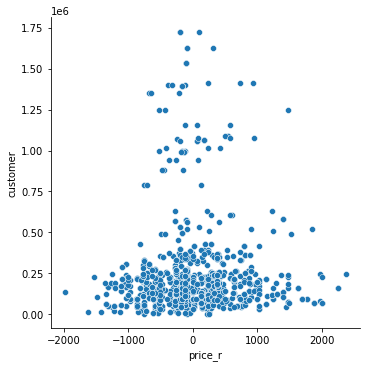

In [83]:
Visualize_all('양파(1.5kg망)','1망')

### '무(1kg)', market, '1개'

<ipython-input-84-13ce2680892d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_gp.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


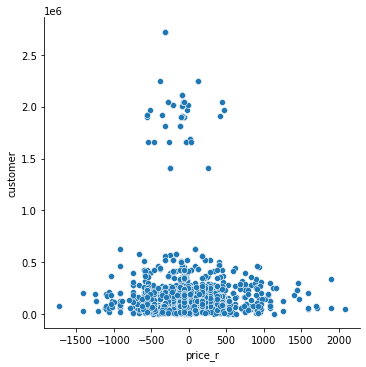

In [84]:
Visualize_all('무(1kg)','1개')

### '고등어(생물,국산)', market, '1마리'

<ipython-input-85-d2d7b471dd51>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_gp.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


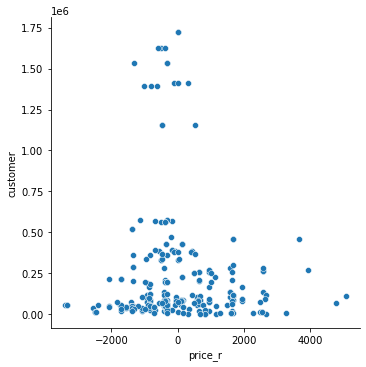

In [85]:
Visualize_all('고등어(생물,국산)','1마리')

### '조기(냉동,수입산)', market, '1마리'

<ipython-input-86-fe31470c3e4e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gpp = df_gp.groupby(['년도','분기'])['년도','분기','가격(원)'].mean()


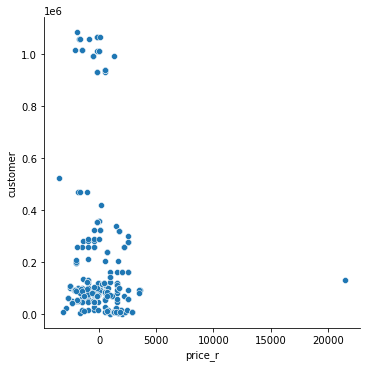

In [86]:
Visualize_all('조기(냉동,수입산)','1마리')

In [87]:
df[['시장이름','년도','분기','년도-월','가격(원)','실판매규격','총_생활인구_수']][(df['품목이름']=='쇠고기(한우,불고기)')&(df['실판매규격']=='600g')&(df['시장이름']=='청담삼익시장')]

,시장이름,년도,분기,년도-월,가격(원),실판매규격,총_생활인구_수
2798,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
2831,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
2856,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
2890,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
2908,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
2938,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
2949,청담삼익시장,2020,4,2020-12,29880,600g,33444.0
11287,청담삼익시장,2020,4,2020-11,35880,600g,33444.0
11304,청담삼익시장,2020,4,2020-11,29880,600g,33444.0
11313,청담삼익시장,2020,4,2020-11,29880,600g,33444.0


In [88]:
df[['시장이름','년도','분기','년도-월','가격(원)','실판매규격','총_생활인구_수']][(df['품목이름']=='쇠고기(한우,불고기)')&(df['실판매규격']=='600g')&(df['시장이름']=='뚝도시장')]

,시장이름,년도,분기,년도-월,가격(원),실판매규격,총_생활인구_수
105798,뚝도시장,2018,4,2018-10,27000,600g,51994.0
106682,뚝도시장,2018,3,2018-09,25000,600g,49166.0
107362,뚝도시장,2018,3,2018-08,27000,600g,49166.0
108297,뚝도시장,2018,3,2018-07,25000,600g,49166.0
108773,뚝도시장,2018,2,2018-06,23500,600g,45761.0
109742,뚝도시장,2018,2,2018-05,23500,600g,45761.0
110728,뚝도시장,2018,2,2018-04,21000,600g,45761.0
111663,뚝도시장,2018,1,2018-03,21000,600g,37998.0
111935,뚝도시장,2018,1,2018-02,30600,600g,37998.0
112598,뚝도시장,2018,1,2018-01,28800,600g,37998.0


18 -> 19,20  단절구간

In [89]:
Visualize_each('오이(다다기)','1개')

C:\Users\123gu\anaconda3\envs\d8\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


   market_name      corr       p_value
0         후암시장  0.048814  4.991015e-01
1         인왕시장  0.002418  9.739426e-01
2      청량리종합시장 -0.031189  6.667709e-01
3         남문시장  0.261686  9.672871e-04
4         광장시장  0.180043  3.526684e-02
5         영천시장  0.132340  8.083896e-02
6         금남시장  0.106748  1.526347e-01
7       자양골목시장 -0.050274  5.412215e-01
8         뚝도시장       NaN           NaN
9         신원시장  0.162670  2.417495e-02
10       남대문시장 -0.157088  3.469566e-02
11        경동시장 -0.156632  2.960637e-02
12        인헌시장  0.160886  2.957678e-02
13    공릉동도깨비시장  0.092392  2.212926e-01
14        현대시장  0.463008  2.321604e-10
15     노룬산골목시장  0.012114  8.746772e-01
16        방이시장  0.105492  1.474617e-01
17        마천시장  0.186147  9.929059e-03
18      서울중앙시장  0.100372  1.693767e-01
19      암사종합시장  0.036372  6.970373e-01
20      상계중앙시장  0.245467  1.534451e-03
21     둔촌역전통시장 -0.081069  3.869815e-01
22    방학동도깨비시장 -0.161890  3.232267e-02
23        통인시장  0.188254  3.627479e-02
24      송화골목시장 -0.134807 

(-0.21818264446699007, 0.010146331399460551)


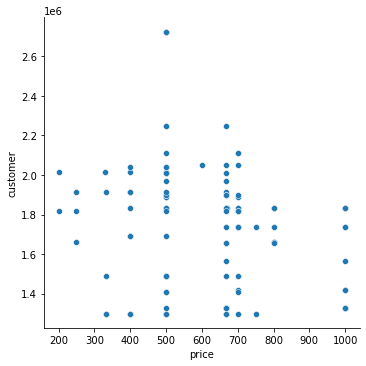

In [90]:
Visualize_market('오이(다다기)','1개','영등포전통시장')

In [91]:
df_check = df[['시장이름','년도','분기','가격(원)','실판매규격','총_생활인구_수']][df['품목이름']=='오이(다다기)']
df_check = df_check[df_check['실판매규격']=='1개'].reset_index()
df_check = df_check[df_check['시장이름']=='영등포전통시장'].reset_index()
df_check

,level_0,index,시장이름,년도,분기,가격(원),실판매규격,총_생활인구_수
0,495,20626,영등포전통시장,2020,3,1000,1개,1329206.0
1,586,22242,영등포전통시장,2020,3,1000,1개,1329206.0
2,587,22257,영등포전통시장,2020,3,1000,1개,1329206.0
3,588,22263,영등포전통시장,2020,3,1000,1개,1329206.0
4,589,22289,영등포전통시장,2020,3,1000,1개,1329206.0
5,590,22304,영등포전통시장,2020,3,1000,1개,1329206.0
6,948,29862,영등포전통시장,2020,3,666,1개,1329206.0
7,949,29872,영등포전통시장,2020,3,666,1개,1329206.0
8,950,29887,영등포전통시장,2020,3,500,1개,1329206.0
9,951,29910,영등포전통시장,2020,3,666,1개,1329206.0


(0.16496782720965225, 0.05775330358515183)


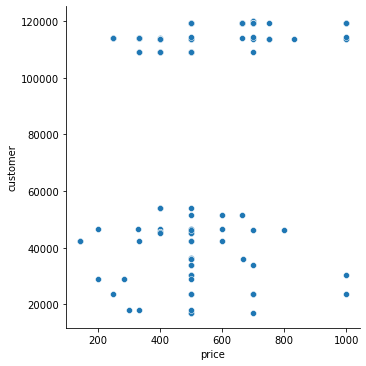

In [92]:
Visualize_market('오이(다다기)','1개','대림중앙시장')

In [93]:
df_check = df[['시장이름','년도','분기','가격(원)','실판매규격','총_생활인구_수']][df['품목이름']=='오이(다다기)']
df_check = df_check[df_check['실판매규격']=='1개'].reset_index()
df_check = df_check[df_check['시장이름']=='대림중앙시장'].reset_index()
df_check

,level_0,index,시장이름,년도,분기,가격(원),실판매규격,총_생활인구_수
0,496,20635,대림중앙시장,2020,3,1000,1개,119292.0
1,562,21792,대림중앙시장,2020,3,1200,1개,119292.0
2,563,21811,대림중앙시장,2020,3,1000,1개,119292.0
3,564,21834,대림중앙시장,2020,3,666,1개,119292.0
4,565,21845,대림중앙시장,2020,3,1000,1개,119292.0
5,566,21847,대림중앙시장,2020,3,666,1개,119292.0
6,898,29003,대림중앙시장,2020,3,500,1개,119292.0
7,899,29019,대림중앙시장,2020,3,500,1개,119292.0
8,900,29030,대림중앙시장,2020,3,666,1개,119292.0
9,901,29047,대림중앙시장,2020,3,666,1개,119292.0


(0.13840413951412495, 0.06098028068212242)


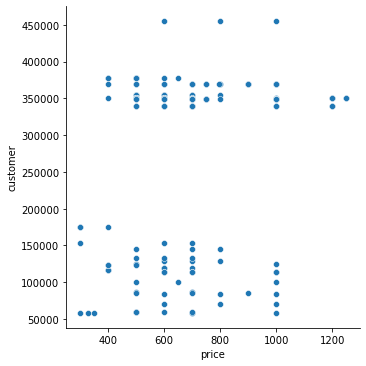

In [94]:
Visualize_market('오이(다다기)','1개','공릉동도깨비시장')

In [95]:
df_check = df[['시장이름','년도','분기','가격(원)','실판매규격','총_생활인구_수']][df['품목이름']=='오이(다다기)']
df_check = df_check[df_check['실판매규격']=='1개'].reset_index()
df_check = df_check[df_check['시장이름']=='공릉동도깨비시장'].reset_index()
df_check

,level_0,index,시장이름,년도,분기,가격(원),실판매규격,총_생활인구_수
0,37,2148,공릉동도깨비시장,2020,4,800,1개,355235.0
1,38,2175,공릉동도깨비시장,2020,4,600,1개,355235.0
2,39,2184,공릉동도깨비시장,2020,4,700,1개,355235.0
3,40,2220,공릉동도깨비시장,2020,4,700,1개,355235.0
4,43,2307,공릉동도깨비시장,2020,4,600,1개,355235.0
5,44,2326,공릉동도깨비시장,2020,4,600,1개,355235.0
6,119,4804,공릉동도깨비시장,2020,4,500,1개,355235.0
7,178,6789,공릉동도깨비시장,2020,4,600,1개,355235.0
8,179,6799,공릉동도깨비시장,2020,4,500,1개,355235.0
9,180,6895,공릉동도깨비시장,2020,4,500,1개,355235.0


(0.25774364240119063, 0.0008007718848008841)


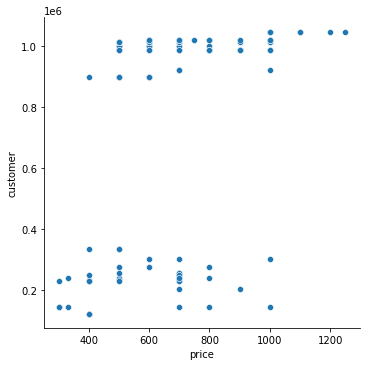

In [96]:
Visualize_market('오이(다다기)','1개','상계중앙시장')

In [97]:
df_check = df[['시장이름','년도','분기','가격(원)','실판매규격','총_생활인구_수']][df['품목이름']=='오이(다다기)']
df_check = df_check[df_check['실판매규격']=='1개'].reset_index()
df_check = df_check[df_check['시장이름']=='상계중앙시장'].reset_index()
df_check

,level_0,index,시장이름,년도,분기,가격(원),실판매규격,총_생활인구_수
0,87,4107,상계중앙시장,2020,4,800,1개,999759.0
1,88,4117,상계중앙시장,2020,4,600,1개,999759.0
2,89,4133,상계중앙시장,2020,4,600,1개,999759.0
3,90,4164,상계중앙시장,2020,4,700,1개,999759.0
4,91,4170,상계중앙시장,2020,4,700,1개,999759.0
5,92,4192,상계중앙시장,2020,4,600,1개,999759.0
6,193,7237,상계중앙시장,2020,4,500,1개,999759.0
7,194,7254,상계중앙시장,2020,4,500,1개,999759.0
8,195,7294,상계중앙시장,2020,4,600,1개,999759.0
9,196,7333,상계중앙시장,2020,4,500,1개,999759.0


In [98]:
Visualize_each('무(1kg)','1개')

   market_name      corr       p_value
0         후암시장  0.071649  3.378119e-01
1         남문시장 -0.050741  5.098396e-01
2         신원시장  0.091926  2.552827e-01
3     마포농수산물시장 -0.021051  8.657283e-01
4       자양골목시장 -0.091961  2.999646e-01
5         인헌시장  0.149277  6.463730e-02
6     공릉동도깨비시장 -0.051727  5.483051e-01
7         망원시장 -0.125982  3.096995e-01
8       암사종합시장 -0.031984  8.066900e-01
9       상계중앙시장  0.124523  1.772401e-01
10     노룬산골목시장  0.343669  3.441474e-05
11        동원시장 -0.284853  3.926475e-04
12       남구로시장  0.087814  4.241964e-01
13      수유전통시장  0.162932  8.465750e-02
14      우림골목시장 -0.313778  9.748040e-05
15        숭인시장  0.093070  3.268524e-01
16        신영시장 -0.010141  8.990436e-01
17        사당시장 -0.676469  2.379623e-15
18        현대시장  0.063251  4.578283e-01
19       목3동시장  0.388746  1.046701e-06
20        인왕시장 -0.295242  1.656350e-03
21        영천시장 -0.177956  7.500765e-02
22      송화골목시장 -0.196943  1.468642e-02
23        도곡시장  0.410411  8.684308e-05
24      화곡본동시장  0.206234 

In [99]:
df_check = df[['시장이름','년도','분기','가격(원)','실판매규격','총_생활인구_수']][df['품목이름']=='무(1kg)']
df_check = df_check[df_check['실판매규격']=='1개'].reset_index()
df_check = df_check[df_check['시장이름']=='청담삼익시장'].reset_index()
df_check

,level_0,index,시장이름,년도,분기,가격(원),실판매규격,총_생활인구_수
0,276,20047,청담삼익시장,2020,3,3980,1개,37698.0
1,359,23050,청담삼익시장,2020,3,2580,1개,37698.0
2,360,23075,청담삼익시장,2020,3,2580,1개,37698.0
3,361,23089,청담삼익시장,2020,3,2580,1개,37698.0
4,362,23114,청담삼익시장,2020,3,2580,1개,37698.0
5,363,23120,청담삼익시장,2020,3,2580,1개,37698.0
6,408,24355,청담삼익시장,2020,3,2580,1개,37698.0
7,409,24391,청담삼익시장,2020,3,2580,1개,37698.0
8,410,24403,청담삼익시장,2020,3,2380,1개,37698.0
9,411,24418,청담삼익시장,2020,3,2380,1개,37698.0


In [100]:
df_check = df[['시장이름','년도','분기','가격(원)','실판매규격','총_생활인구_수']][df['품목이름']=='무(1kg)']
df_check = df_check[df_check['실판매규격']=='1개'].reset_index()
df_check = df_check[df_check['시장이름']=='목3동시장'].reset_index()
df_check

,level_0,index,시장이름,년도,분기,가격(원),실판매규격,총_생활인구_수
0,258,19109,목3동시장,2020,3,3500,1개,430599.0
1,299,21088,목3동시장,2020,3,2000,1개,430599.0
2,301,21132,목3동시장,2020,3,2000,1개,430599.0
3,303,21199,목3동시장,2020,3,1500,1개,430599.0
4,304,21205,목3동시장,2020,3,1500,1개,430599.0
5,305,21211,목3동시장,2020,3,2000,1개,430599.0
6,462,25613,목3동시장,2020,3,1500,1개,430599.0
7,498,26280,목3동시장,2020,3,1500,1개,430599.0
8,502,26367,목3동시장,2020,3,1500,1개,430599.0
9,503,26369,목3동시장,2020,3,1500,1개,430599.0


(0.3887464725074653, 1.046700534931773e-06)


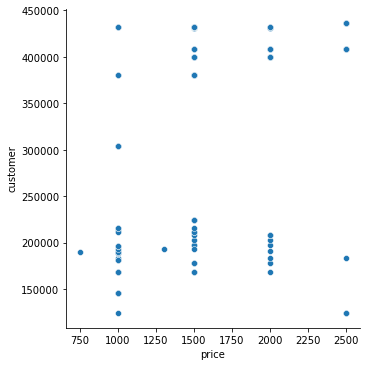

In [101]:
Visualize_market('무(1kg)','1개','목3동시장')